# Calgary AI Chapter

## Session 1: Structured RAG

## Setup
To get started, we need to install the last version of the following libraries.

Intalling all the relevant libriaries

- Groq
- PandasAI
- LangChain

In [1]:
!pip install pandasai
!pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.8/179.8 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 57.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 33.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 367.8/367.8 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 334.5/334.5 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.2 MB/s eta 0:00:00
  Attempting uninstall: sqlglot
    Found existing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 453.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.4/290.4 kB 20.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.8 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [1]:
import os
import pandas as pd
from pandasai import Agent, SmartDataframe
from groq import Groq
from langchain_groq.chat_models import ChatGroq
from IPython.display import display, Markdown, Image
import warnings

warnings.filterwarnings('ignore')

### Get your keys
- https://www.pandabi.ai/
- https://groq.com/

### Setting up environment variables

In [2]:
os.environ['PANDASAI_API_KEY'] = ""
os.environ['GROQ_API_KEY'] = ""

## Large Language Models

In [3]:
client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "What is a LLMs?",
        }
    ],
    model="llama-3.1-70b-versatile",
)

display(Markdown(chat_completion.choices[0].message.content))

A Large Language Model (LLM) is a type of artificial intelligence (AI) designed to process and understand human language. LLMs are trained on massive amounts of text data, which enables them to learn patterns, relationships, and structures of language.

LLMs are typically based on deep learning architectures, such as transformer models, and are trained using large-scale datasets of text from various sources, including books, articles, websites, and more. This training process allows LLMs to develop a deep understanding of language, including:

1. **Syntax**: The rules that govern the structure of language, including grammar, punctuation, and word order.
2. **Semantics**: The meaning of words, phrases, and sentences, including nuances, context, and relationships between concepts.
3. **Pragmatics**: How language is used in context, including idioms, figurative language, and implied meaning.

LLMs can perform a wide range of tasks, including:

1. **Text generation**: Creating text based on a prompt or topic.
2. **Text summarization**: Condensing long pieces of text into shorter summaries.
3. **Language translation**: Translating text from one language to another.
4. **Conversational AI**: Responding to user input in a conversational manner.
5. **Sentiment analysis**: Identifying emotions and opinions expressed in text.

Some of the benefits of LLMs include:

1. **Improved accuracy**: LLMs can process and understand language more accurately than humans in many cases.
2. **Scalability**: LLMs can handle vast amounts of data and perform tasks quickly and efficiently.
3. **Personalization**: LLMs can be fine-tuned to adapt to specific styles, genres, or topics.

Examples of LLMs include popular AI models like:

1. **BERT** (Bidirectional Encoder Representations from Transformers)
2. **RoBERTa** (Robustly Optimized BERT Pretraining Approach)
3. **GPT-3** (Generative Pre-trained Transformer 3)
4. **LLaMA** (Large Language Model Application)

These models have revolutionized the field of natural language processing (NLP) and have numerous applications in industries like chatbots, virtual assistants, content generation, and more.

In [4]:
llm = ChatGroq(model_name = 'llama-3.1-8b-instant', api_key = os.environ['GROQ_API_KEY'])
display(Markdown(llm.invoke("What is a LLM?").content))

LLM stands for Large Language Model. It's a type of artificial intelligence (AI) model designed to process and generate human-like language. LLMs are trained on vast amounts of text data, allowing them to learn patterns, relationships, and context within language.

These models are typically based on the transformer architecture, which was introduced in 2017. The transformer architecture is particularly well-suited for natural language processing (NLP) tasks because it enables the model to attend to different parts of the input sequence simultaneously, allowing it to capture long-range dependencies and context.

Large language models have several key characteristics:

1. **Training data**: LLMs are trained on massive datasets of text, often sourced from the internet, books, and other sources.
2. **Transformer architecture**: LLMs use the transformer architecture, which allows them to process input sequences in parallel and capture long-range dependencies.
3. **Self-supervised learning**: LLMs are trained using self-supervised learning, where the model is trained to predict missing or corrupted input data.
4. **Generative capabilities**: LLMs can generate text, answer questions, and even create new content, such as stories, dialogue, or even entire articles.
5. **Scalability**: LLMs can be scaled up to process longer input sequences and generate more complex output.

Some of the key benefits of large language models include:

* **Improved language understanding**: LLMs can understand nuances of language, such as idioms, sarcasm, and figurative language.
* **Enhanced creativity**: LLMs can generate new and original content, such as stories, dialogue, or even entire articles.
* **Efficient information retrieval**: LLMs can quickly retrieve relevant information from vast datasets, making them useful for applications such as search engines and chatbots.

However, large language models also have some limitations and challenges:

* **Data quality**: LLMs are only as good as the data they are trained on, and poor-quality data can lead to biased or inaccurate outputs.
* **Explainability**: LLMs can be difficult to interpret and understand, making it challenging to explain their outputs or decisions.
* **Security and safety**: LLMs can be used for malicious purposes, such as generating fake news or spreading disinformation.

Overall, large language models have the potential to revolutionize many areas of application, from customer service and language translation to content creation and research. However, it's essential to carefully consider the limitations and challenges associated with these models to ensure they are used responsibly and ethically.

## RAG (Retrieval Augmented Generation)

![](https://miro.medium.com/v2/resize:fit:1200/0*kizFfetpLsjOiK9a.png)

In [5]:
#! Sample data

df = pd.DataFrame({
    "country": [
        "United States",
        "United Kingdom",
        "France",
        "Germany",
        "Italy",
        "Spain",
        "Canada",
        "Australia",
        "Japan",
        "China",
    ],
    "gdp": [
        19294482071552,
        2891615567872,
        2411255037952,
        3435817336832,
        1745433788416,
        1181205135360,
        1607402389504,
        1490967855104,
        4380756541440,
        14631844184064,
    ],
    "happiness_index": [6.94, 7.16, 6.66, 7.07, 6.38, 6.4, 7.23, 7.22, 5.87, 5.12],
})

In [6]:
df

,country,gdp,happiness_index
0,United States,19294482071552,6.94
1,United Kingdom,2891615567872,7.16
2,France,2411255037952,6.66
3,Germany,3435817336832,7.07
4,Italy,1745433788416,6.38
5,Spain,1181205135360,6.40
6,Canada,1607402389504,7.23
7,Australia,1490967855104,7.22
8,Japan,4380756541440,5.87
9,China,14631844184064,5.12


In [7]:
agent = Agent([df], config={ "verbose": False, "enable_cache": False})

## Analyze the data

### Data Shape

In [8]:
response = agent.chat("What is the shape of the data?")
response

'The shape of the data is (10, 3).'

In [9]:
response = agent.chat("What is the average happiness_index?")
response

'The average happiness index is 6.6049999999999995.'

In [10]:
response = agent.chat("Give me all the Countries that have above average happiness_index?")
response

,country
0,United States
1,United Kingdom
2,France
3,Germany
6,Canada
7,Australia


### Visualizations

'/content/exports/charts/temp_chart.png'

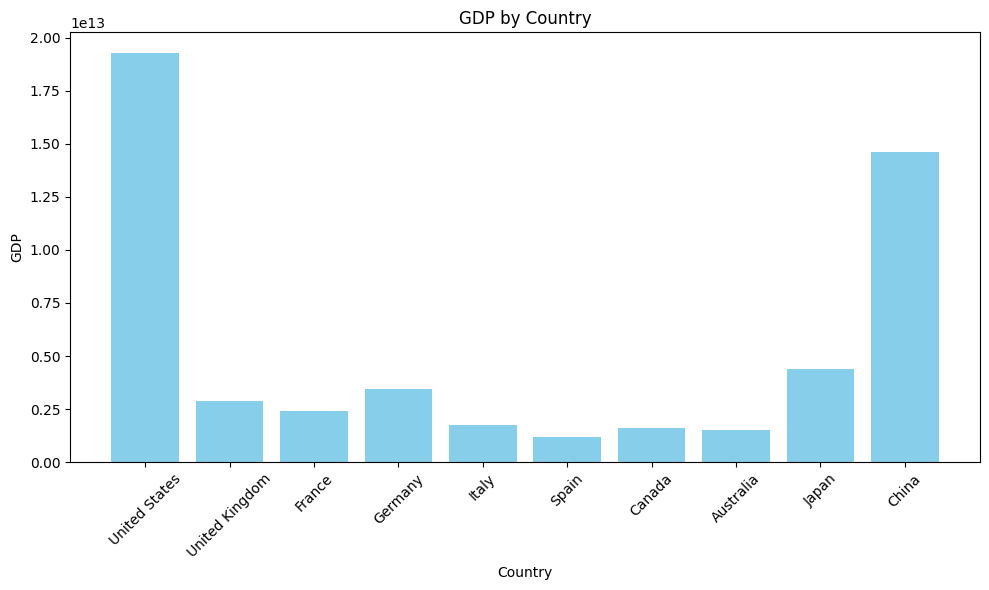

In [14]:
response = agent.chat("Plot a chart of the gdp by country")
response

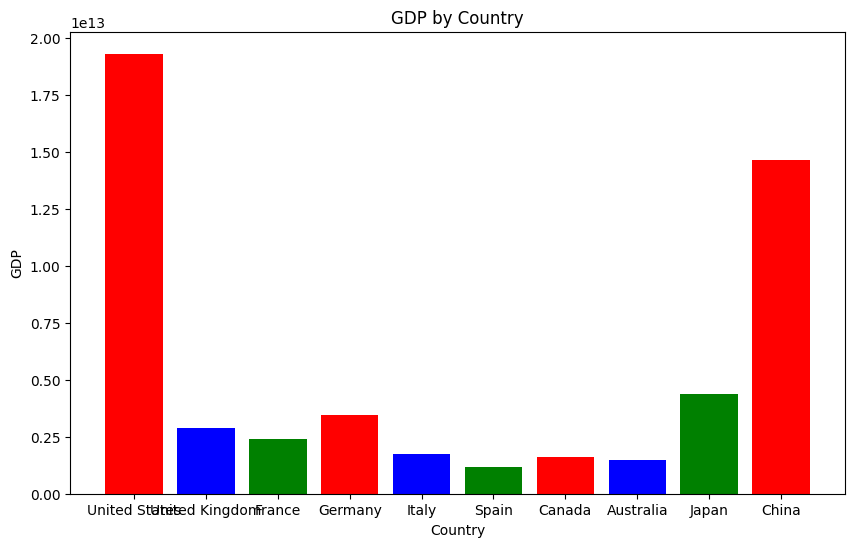

'/content/exports/charts/temp_chart.png'

In [17]:
response = agent.chat("Plot a chart of the gdp by country, make sure its a unique color for each bar")
response

In [18]:
df = pd.read_csv('https://raw.githubusercontent.com/getmykhan/teachingMachineLearning/master/Datasets/dataset_housing_sample.csv')

In [19]:
df.head()

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,...,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid
0,"930 S Prospect Ave SW, Calgary, AB T2T 0W5",Calgary,AB,930 S Prospect Ave SW,T2T0W5,5297.0,NaN,6.0,5.0,Sotheby's International Realty Canada,...,House for sale,FOR_SALE,NaN,NaN,11000000,NaN,NaN,NaN,NaN,439485614
1,"122 E Douglasview Rise SE, Calgary, AB T2Z 2P5",Calgary,AB,122 E Douglasview Rise SE,T2Z2P5,2161.0,NaN,4.0,5.0,Re/Max Real Estate (Mountain View),...,House for sale,FOR_SALE,NaN,NaN,839900,NaN,NaN,NaN,NaN,2062287923
2,"93 E Setonstone Grn SE, Calgary, AB T3M 3R9",Calgary,AB,93 E Setonstone Grn SE,T3M3R9,1745.0,NaN,3.0,3.0,First Place Realty,...,House for sale,FOR_SALE,NaN,NaN,679900,NaN,NaN,NaN,NaN,439870615
3,"27 E Coleridge Cres NW, Calgary, AB T2K 1X8",Calgary,AB,27 E Coleridge Cres NW,T2K1X8,1865.0,NaN,3.0,6.0,Royal Lepage Benchmark,...,House for sale,FOR_SALE,NaN,NaN,969900,NaN,NaN,NaN,NaN,439875886
4,"1154 SW Varsity Estates Dr NW, Calgary, AB T3B...",Calgary,AB,1154 SW Varsity Estates Dr NW,T3B5G8,4082.0,NaN,5.0,6.0,Homecare Realty Ltd.,...,House for sale,FOR_SALE,NaN,NaN,1789000,NaN,NaN,NaN,NaN,439854656


In [20]:
pd.set_option('display.max_columns', None)

In [21]:
df.head()

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid
0,"930 S Prospect Ave SW, Calgary, AB T2T 0W5",Calgary,AB,930 S Prospect Ave SW,T2T0W5,5297.0,NaN,6.0,5.0,Sotheby's International Realty Canada,NaN,https://photos.zillowstatic.com/fp/22e837041b8...,http

In [22]:
#! Quick Preprocessing

df['quadrant'] = df['addressStreet'].apply(lambda x: x.split()[-1])

#! Cleaning the data
df = df[df['quadrant'].isin(df['quadrant'].value_counts().head(4).index)]

In [23]:
df['price'] = df['price'].apply(lambda x: x.replace('C$', '').replace(',', '')).astype(float)

In [24]:
df['house_image']  = df['imgSrc']

In [25]:
df.head()

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid,quadrant,house_image
0,"930 S Prospect Ave SW, Calgary, AB T2T 0W5",Calgary,AB,930 S Prospect Ave SW,T2T0W5,5297.0,NaN,6.0,5.0,Sotheby's International Realty Canada,NaN,https://photos.zillowstatic.com/f

In [26]:
df.columns

Index(['address', 'addressCity', 'addressState', 'addressStreet',
       'addressZipcode', 'area', 'availabilityDate', 'baths', 'beds',
       'brokerName',
       ...
       'streetViewMetadataURL', 'streetViewURL', 'unformattedPrice',
       'zoomQuadrantSequence/0', 'zoomQuadrantSequence/1',
       'zoomQuadrantSequence/2', 'zoomQuadrantSequence/3', 'zpid', 'quadrant',
       'house_image'],
      dtype='object', length=167)

In [27]:
df.head()

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid,quadrant,house_image
0,"930 S Prospect Ave SW, Calgary, AB T2T 0W5",Calgary,AB,930 S Prospect Ave SW,T2T0W5,5297.0,NaN,6.0,5.0,Sotheby's International Realty Canada,NaN,https://photos.zillowstatic.com/f

In [28]:
agent = SmartDataframe(df, config={"verbose": False, "enable_cache": False})

In [29]:
agent.chat("Which broker has the most listings?")

'The broker with the most listings is: Exp Realty'

In [31]:
agent.chat("What are the most common home types?")

'The most common home type is: Single Family.'

In [33]:
agent.chat("What is the average price of a house?")

'The average price of a house is $927809.02.'

In [34]:
print(agent.last_code_generated)

data = {'address': ['209 SW Elgin Estates Park SE, Calgary, AB T2Z 0N6', '274 E Covecreek Close NE, Calgary, AB T3K 0J6', '148 W Skyview Point Grn NE, Calgary, AB T3N 0G7'], 'price': [7511004671, 548000, 2990000]}
average_price = sum(dfs[0]['price']) / len(dfs[0]['price'])
result = {'type': 'string', 'value': f'The average price of a house is ${average_price:.2f}.'}


In [35]:
agent.chat("Can you give me tell me how many houses do each seller have? and sort it by descending order?")

,Broker Name,Number of Houses
0,Exp Realty,251
1,Cir Realty,219
2,Real Broker,189
3,Re/Max Real Estate (Central),151
4,Re/Max House Of Real Estate,121
...,...,...
119,Realty 2000 Inc.,1
120,Jaymz Town Real Estate,1
121,Coldwell Banker Home Smart Real Estate,1
122,Avenue Home Realty Inc.,1


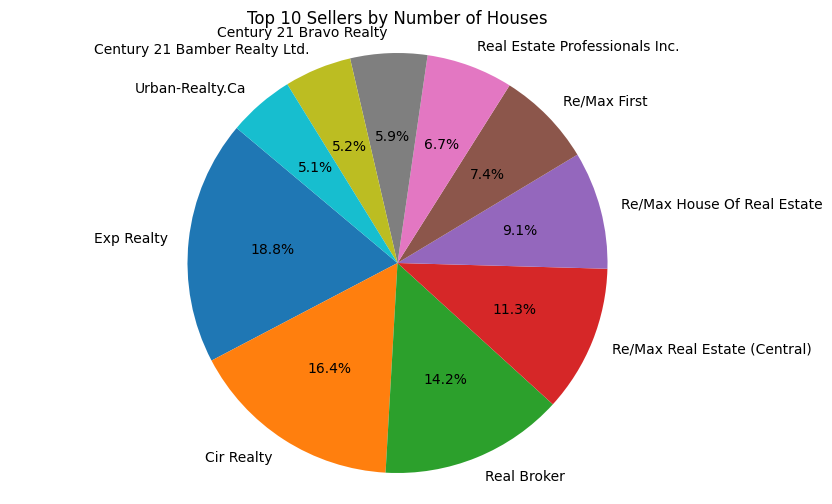

'/content/exports/charts/temp_chart.png'

In [37]:
agent.chat("Can you visualize the top 10 seller by the number of houses they have? visualize it as a piechart")

In [38]:
print(agent.last_code_generated)

df = pd.concat(dfs)
seller_counts = df['brokerName'].value_counts().head(10)
plt.figure(figsize=(10, 6))
plt.pie(seller_counts, labels=seller_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Top 10 Sellers by Number of Houses')
plt.show()
result = {'type': 'plot', 'value': '/content/exports/charts/temp_chart.png'}


'/content/exports/charts/temp_chart.png'

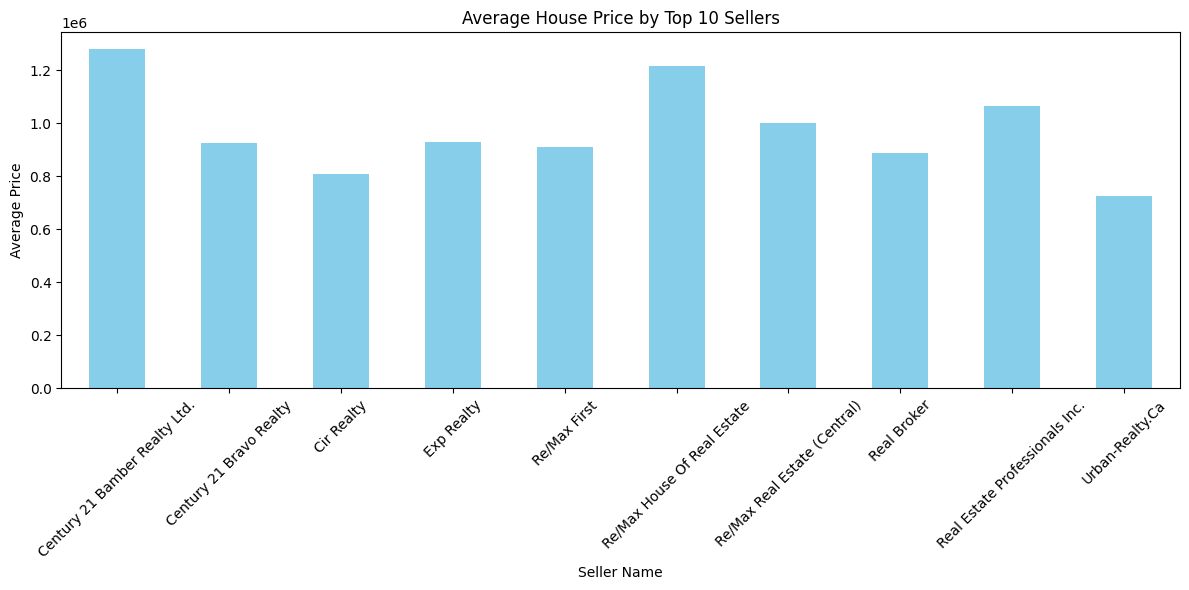

In [39]:
agent.chat("Visualize for me average house price by the top 10 sellers as barplot?")

In [42]:
agent.chat("Which seller has the most expensive property? and how much is it?")

"The seller with the most expensive property is Sotheby's International Realty Canada with a price of CAD 11000000."

In [43]:
print(agent.last_code_generated)

seller_prices = []
for df in dfs:
    seller_prices.extend(zip(df['brokerName'], df['hdpData/homeInfo/price']))
seller_price_df = pd.DataFrame(seller_prices, columns=['Seller', 'Price'])
most_expensive_seller = seller_price_df.loc[seller_price_df['Price'].idxmax()]['Seller']
most_expensive_price = seller_price_df['Price'].max()
result = {'type': 'string', 'value': f'The seller with the most expensive property is {most_expensive_seller} with a price of CAD {most_expensive_price}.'}


'/content/exports/charts/temp_chart.png'

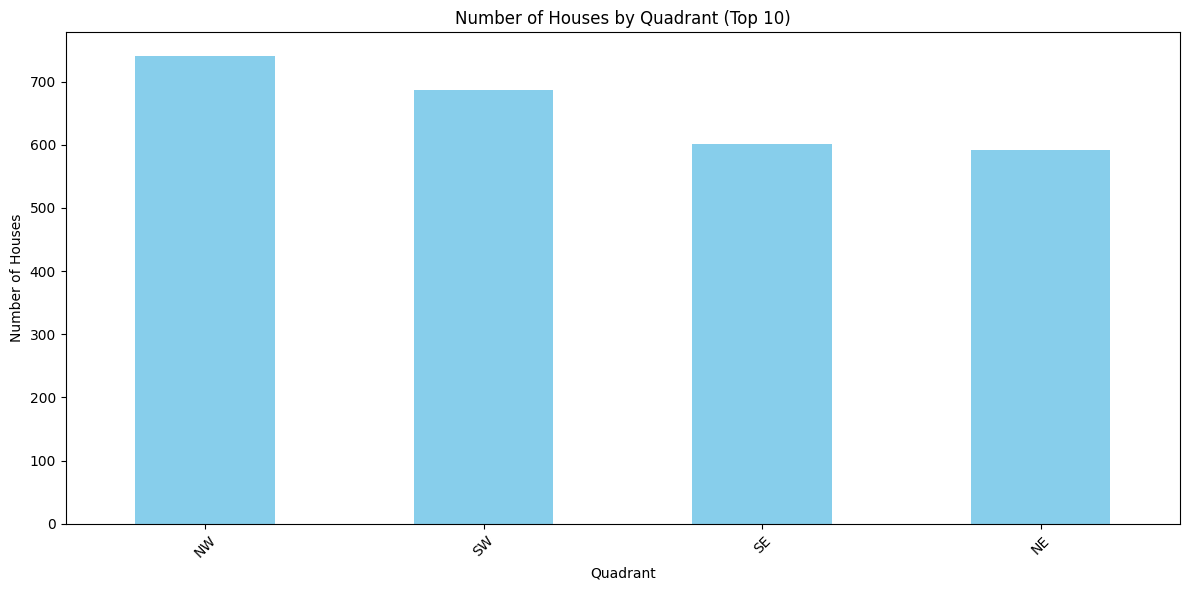

In [44]:
agent.chat("Can you give me the breakdown of the number of houses by quadrant?")

In [46]:
agent.chat("Can you list me the cheapest property for each quadrant? include their address")

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid,quadrant,house_image
1734,"289 Burroughs Cir NE, Calgary, AB T1Y 6K8",Calgary,AB,289 Burroughs Cir NE,T1Y6K8,1412.0,NaN,2.0,4.0,Maxwell Canyon Creek,NaN,https://photos.zillowstatic.com/fp/19803889c4f...

In [47]:
print(agent.last_code_generated)

cheapest_properties = pd.concat(dfs)
cheapest_properties = cheapest_properties.loc[cheapest_properties.groupby('quadrant')['price'].idxmin()]
result = {'type': 'dataframe', 'value': cheapest_properties}


In [48]:
df.head()

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid,quadrant,house_image
0,"930 S Prospect Ave SW, Calgary, AB T2T 0W5",Calgary,AB,930 S Prospect Ave SW,T2T0W5,5297.0,NaN,6.0,5.0,Sotheby's International Realty Canada,NaN,https://photos.zillowstatic.com/f

In [49]:
preference = """
Can you give me all the listings for 3 bedrooms that have atleast an area of 2200
I also need 3 bathrooms that are in the sw quadrant. But make sure that the price is less than 1000000
"""

In [50]:
agent.chat(preference)

,address,addressCity,addressState,addressStreet,addressZipcode,area,availabilityDate,baths,beds,brokerName,builderName,carouselPhotos/0/url,carouselPhotos/1/url,carouselPhotos/2/url,carouselPhotos/3/url,carouselPhotos/4/url,carouselPhotos/5/url,carouselPhotos/6/url,carouselPhotos/7/url,carouselPhotos/8/url,carouselPhotos/9/url,carouselPhotos/10/url,carouselPhotos/11/url,carouselPhotos/12/url,carouselPhotos/13/url,carouselPhotos/14/url,carouselPhotos/15/url,carouselPhotos/16/url,carouselPhotos/17/url,carouselPhotos/18/url,carouselPhotos/19/url,carouselPhotos/20/url,carouselPhotos/21/url,carouselPhotos/22/url,carouselPhotos/23/url,carouselPhotos/24/url,carouselPhotos/25/url,carouselPhotos/26/url,carouselPhotos/27/url,carouselPhotos/28/url,carouselPhotos/29/url,carouselPhotos/30/url,carouselPhotos/31/url,carouselPhotos/32/url,carouselPhotos/33/url,carouselPhotos/34/url,carouselPhotos/35/url,carouselPhotos/36/url,carouselPhotos/37/url,carouselPhotos/38/url,carouselPhotos/39/url,carouselPhotos/40/url,carouselPhotos/41/url,carouselPhotos/42/url,carouselPhotos/43/url,carouselPhotos/44/url,carouselPhotos/45/url,carouselPhotos/46/url,carouselPhotos/47/url,carouselPhotos/48/url,carouselPhotos/49/url,carouselPhotos/50/url,carouselPhotos/51/url,carouselPhotos/52/url,carouselPhotos/53/url,carouselPhotos/54/url,carouselPhotos/55/url,carouselPhotos/56/url,carouselPhotos/57/url,carouselPhotos/58/url,countryCurrency,detailUrl,flexFieldText,flexFieldType,foundFromSearchUrl,foundOnSearchPage,has3DModel,hasAdditionalAttributions,hasImage,hasOpenHouse,hasVideo,hdpData/homeInfo/bathrooms,hdpData/homeInfo/bedrooms,hdpData/homeInfo/city,hdpData/homeInfo/country,hdpData/homeInfo/currency,hdpData/homeInfo/datePriceChanged,hdpData/homeInfo/daysOnZillow,hdpData/homeInfo/group_type,hdpData/homeInfo/homeStatus,hdpData/homeInfo/homeStatusForHDP,hdpData/homeInfo/homeType,hdpData/homeInfo/isFeatured,hdpData/homeInfo/isNonOwnerOccupied,hdpData/homeInfo/isPreforeclosureAuction,hdpData/homeInfo/isPremierBuilder,hdpData/homeInfo/isShowcaseListing,hdpData/homeInfo/isUnmappable,hdpData/homeInfo/isZillowOwned,hdpData/homeInfo/latitude,hdpData/homeInfo/listing_sub_type/is_FSBA,hdpData/homeInfo/listing_sub_type/is_newHome,hdpData/homeInfo/listing_sub_type/is_openHouse,hdpData/homeInfo/livingArea,hdpData/homeInfo/longitude,hdpData/homeInfo/lotAreaUnit,hdpData/homeInfo/lotAreaValue,hdpData/homeInfo/newConstructionType,hdpData/homeInfo/openHouse,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/0/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/1/open_house_start,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_end,hdpData/homeInfo/open_house_info/open_house_showing/2/open_house_start,hdpData/homeInfo/price,hdpData/homeInfo/priceChange,hdpData/homeInfo/priceForHDP,hdpData/homeInfo/priceReduction,hdpData/homeInfo/priceSuffix,hdpData/homeInfo/providerListingID,hdpData/homeInfo/shouldHighlight,hdpData/homeInfo/state,hdpData/homeInfo/streetAddress,hdpData/homeInfo/timeOnZillow,hdpData/homeInfo/unit,hdpData/homeInfo/zipcode,hdpData/homeInfo/zpid,id,imgSrc,info1String,isFeaturedListing,isHomeRec,isPropertyResultCDP,isSaved,isShowcaseListing,isUndisclosedAddress,isUserClaimingOwner,isUserConfirmedClaim,isZillowOwned,latLong/latitude,latLong/longitude,list,lotAreaString,marketingStatusSimplifiedCd,openHouseDescription,openHouseEndDate,openHouseStartDate,pgapt,price,providerListingId,rawHomeStatusCd,relaxed,sgapt,shouldShowZestimateAsPrice,statusText,statusType,streetViewMetadataURL,streetViewURL,unformattedPrice,zoomQuadrantSequence/0,zoomQuadrantSequence/1,zoomQuadrantSequence/2,zoomQuadrantSequence/3,zpid,quadrant,house_image
13,"47 S Discovery Ridge Cir SW, Calgary, AB T3H 5T8",Calgary,AB,47 S Discovery Ridge Cir SW,T3H5T8,2373.0,NaN,3.0,3.0,Re/Max Irealty Innovations,NaN,https://photos.zillowstatic.com

In [51]:
print(agent.last_code_generated)

filtered_listings = []
for df in dfs:
    filtered_df = df[(df['beds'] == 3) & (df['area'] >= 2200) & (df['baths'] == 3) & (df['quadrant'] == 'SW') & (df['price'] < 1000000)]
    filtered_listings.append(filtered_df)
result = {'type': 'dataframe', 'value': pd.concat(filtered_listings)}


## Advanced Usage Calling

In [52]:
!pip install langchain_experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.2/207.2 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.0 MB/s eta 0:00:00


In [53]:
df = df[['addressState','address', 'addressCity', 'addressState', 'addressStreet',
       'addressZipcode', 'area', 'availabilityDate', 'baths', 'beds',
       'brokerName', 'price']].copy()

In [54]:
df.shape

(2622, 12)

In [55]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [56]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x78ce6d94eda0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x78ce6d94e1d0>, model_name='llama-3.1-8b-instant', groq_api_key=SecretStr('**********'))

In [57]:
agent = create_pandas_dataframe_agent(
    llm, df, verbose=True, allow_dangerous_code=True, handle_parsing_errors=True)

In [58]:
agent.invoke("Describe the data?")



> Entering new AgentExecutor chain...
Thought: To describe the data, I can use the `info()` function in pandas which will give me a concise summary of the DataFrame.
Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
Int64Index: 2622 entries, 0 to 4529
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   addressState      2622 non-null   object 
 1   address           2622 non-null   object 
 2   addressCity       2622 non-null   object 
 3   addressState      2622 non-null   object 
 4   addressStreet     2622 non-null   object 
 5   addressZipcode    2622 non-null   object 
 6   area              2566 non-null   float64
 7   availabilityDate  390 non-null    object 
 8   baths             2548 non-null   float64
 9   beds              2548 non-null   float64
 10  brokerName        2619 non-null   object 
 11  price             2622 non-null   float64
dtypes: float64(4), 

{'input': 'Describe the data?',
 'output': 'The DataFrame contains information about properties, including address, area, price, and more. It has 2622 entries and 12 columns, with 4 numerical columns (area, baths, beds, price) and 8 object type columns (addressState, address, addressCity, addressState, addressStreet, addressZipcode, availabilityDate, brokerName).'}

In [59]:
agent.invoke("What is the average price of a house?")



> Entering new AgentExecutor chain...
Thought: To find the average price of a house, I need to calculate the mean of the 'price' column in the dataframe.
Action: python_repl_ast
Action Input: df['price'].mean()927809.0179252479Thought: The average price of a house is the mean of the 'price' column in the dataframe.

Action: python_repl_ast
Action Input: print(f"The average price of a house is ${df['price'].mean():,.2f}")The average price of a house is $927,809.02
Question: What is the average price of a house?
Thought: To find the average price of a house, I need to calculate the mean of the 'price' column in the dataframe.
Action: python_repl_ast
Action Input: df['price'].mean()927809.0179252479Question: What is the average price of a house?
Thought: To find the average price of a house, I need to calculate the mean of the 'price' column in the dataframe.
Action: python_repl_ast
Action Input: df['price'].mean()927809.0179252479Question: What is the average price of a house?
Thought:

{'input': 'What is the average price of a house?', 'output': '$927,809.02'}

In [60]:
preference = """
Can you give me all the listings for 3 bedrooms that have atleast an area of 2200
I also need 3 bathrooms that are in the sw quadrant. But make sure that the price is less than 1000000
"""

agent.invoke(preference)



> Entering new AgentExecutor chain...
Thought: I will use the filtering capabilities of pandas to select the desired rows from the dataframe.
Action: python_repl_ast
Action Input: `df[(df['beds'] == 3) & (df['area'] >= 2200) & (df['baths'] == 3) & (df['addressCity'] == 'Calgary') & (df['addressStreet'].str.contains('SW')) & (df['price'] < 1000000)]`     addressState                                           address  \
13             AB  47 S Discovery Ridge Cir SW, Calgary, AB T3H 5T8   
520            AB           123 W Coach Way SW, Calgary, AB T3H 0M8   
1257           AB     125 S Creekstone Path SW, Calgary, AB T2X 4P8   
1268           AB     105 N Creekstone Path SW, Calgary, AB T2X 4P7   
1277           AB  5 S Silverado Creek Cres SW, Calgary, AB T2X 0C5   
1347           AB      240 S Creekstone Row SW, Calgary, AB T2X 4Y5   
3387           AB        151 E Everbrook Dr SW, Calgary, AB T2Y 0L6   

     addressCity addressState                addressStreet addressZipcode  \
1

{'input': '\nCan you give me all the listings for 3 bedrooms that have atleast an area of 2200\nI also need 3 bathrooms that are in the sw quadrant. But make sure that the price is less than 1000000\n',
 'output': 'There are 7 listings for the selected criteria.'}

### Practice!!